Import Library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

Accessing Dataset

In [14]:
dataset_path = 'C:/Users/Marsyani/Documents/dataset-ml'

In [15]:
selected_classes = ['baju-barong', 'cincin-silver', 'hiasan-dinding', 'kipas-kayu-bali', 'tas-rajut']

In [16]:
# Check if the folders exist in the dataset directory
available_classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Available classes:", available_classes)

# Ensure the selected classes exist in the dataset directory
selected_classes = [cls for cls in selected_classes if cls in available_classes]
print("Selected classes:", selected_classes)

Available classes: ['.git', 'anting-kayu-bali', 'anting-silver', 'baju-barong', 'baju-bintang', 'baju-i-love-bali', 'cincin-silver', 'coaster', 'dream-catcher', 'gantungan-kunci', 'gelang-manik-bali', 'gelang-tridatu', 'hiasan-dinding', 'jepit-rambut', 'kain-pantai-bali', 'kalung-silver', 'keben-bali', 'kipas-kayu-bali', 'kotak-tisu', 'lilin-aromaterapi', 'pie-susu', 'tas-anyaman', 'tas-rajut', 'tas-rotan', 'tempat-lilin', 'topeng-bujuh', 'topeng-dalem', 'topeng-keras', 'topeng-penasar', 'topeng-sidakarya', 'topeng-tua', 'topeng-wijil', 'udeng', '_image_url', '_utilities']
Selected classes: ['baju-barong', 'cincin-silver', 'hiasan-dinding', 'kipas-kayu-bali', 'tas-rajut']


Preprocessing and Data Augmentation

In [17]:
# Set image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Define data augmentation and preprocessing for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

# Define preprocessing for the validation data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create the training data generator
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=selected_classes
)

# Create the validation data generator
val_data = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=selected_classes
)

Found 840 images belonging to 5 classes.
Found 208 images belonging to 5 classes.


Model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(selected_classes), activation='softmax')  # Output sesuai jumlah kelas unik
])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,531,717 (51.62 MB)

 Trainable params: 13,531,717 (51.62 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Import necessary modules
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the learning rate scheduler function
def lr_scheduler(epoch, lr):
    """
    Decrease the learning rate based on the epoch.
    - Halve the learning rate every 5 epochs.
    """
    if epoch > 0 and epoch % 5 == 0:  # Reduce LR every 5 epochs
        return lr * 0.5
    return lr

# Create the LearningRateScheduler callback
lr_callback = LearningRateScheduler(lr_scheduler)

Compile the Model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

Train the Model

In [38]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    verbose=1
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 398ms/step - accuracy: 0.4598 - loss: 1.7707 - val_accuracy: 0.5577 - val_loss: 1.0628
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 417ms/step - accuracy: 0.5621 - loss: 1.0648 - val_accuracy: 0.6779 - val_loss: 0.7554
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 397ms/step - accuracy: 0.7450 - loss: 0.6852 - val_accuracy: 0.7837 - val_loss: 0.6001
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 405ms/step - accuracy: 0.8268 - loss: 0.4226 - val_accuracy: 0.7260 - val_loss: 0.8787
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step - accuracy: 0.7992 - loss: 0.5207 - val_accuracy: 0.7644 - val_loss: 0.8445
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 413ms/step - accuracy: 0.8377 - loss: 0.3857 - val_accuracy: 0.8462 - val_loss: 0.5615
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step - accuracy: 0.9189 - loss: 0.2285 - val_accuracy: 0.8654 - val_loss: 0.4837
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 407ms/step - accuracy: 0.9303 - loss: 0.2000 - val_accu

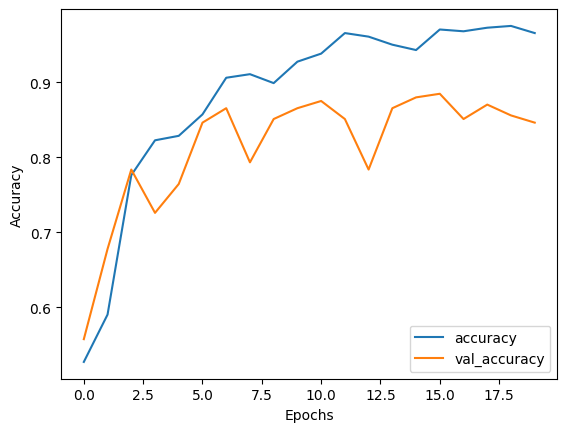

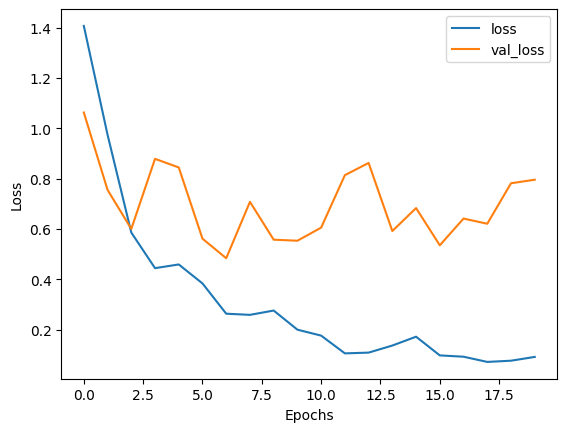

In [40]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


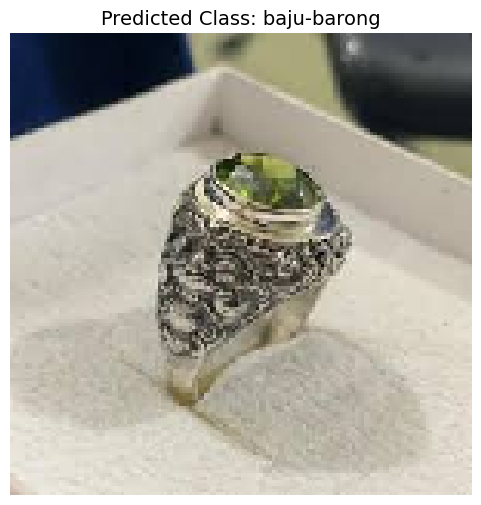

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
img_path = "C:/Users/Marsyani/Documents/dataset-ml/test-cincin.jpeg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(train_data.class_indices.keys())

# Display the image and the predicted class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_labels[predicted_class[0]]}", fontsize=14)
plt.show()

Transfer Learning

In [44]:
pip install tensorflow==2.15.* 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.* (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.15.*

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from keras.applications import Xception
import tensorflow as tf
from tensorflow.keras import  optimizers

In [46]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step


In [47]:
for layer in base_model.layers:
    layer.trainable = False

In [53]:
model = tf.keras.models.Sequential([
    base_model,

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5,activation='softmax'),
])

In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,970,221 (129.59 MB)

 Trainable params: 13,108,741 (50.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [55]:
optimizer = optimizers.Adam()

In [56]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

In [57]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 700ms/step - accuracy: 0.6577 - loss: 9.0719 - val_accuracy: 0.9615 - val_loss: 0.2601
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 674ms/step - accuracy: 0.9621 - loss: 0.3222 - val_accuracy: 0.9760 - val_loss: 0.0487
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 683ms/step - accuracy: 0.9799 - loss: 0.1550 - val_accuracy: 0.9904 - val_loss: 0.0164
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 667ms/step - accuracy: 0.9845 - loss: 0.0922 - val_accuracy: 0.9856 - val_loss: 0.0373
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 667ms/step - accuracy: 0.9816 - loss: 0.0818 - val_accuracy: 0.9760 - val_loss: 0.0977


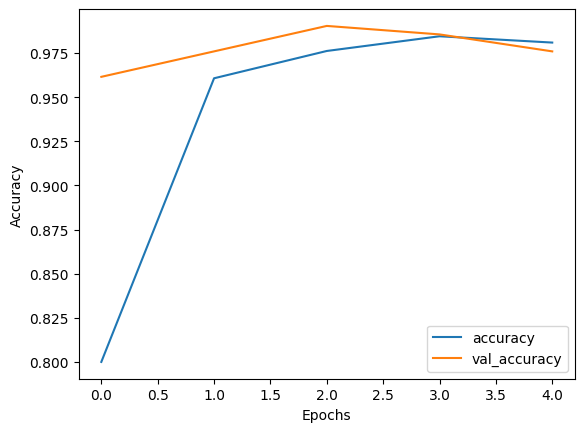

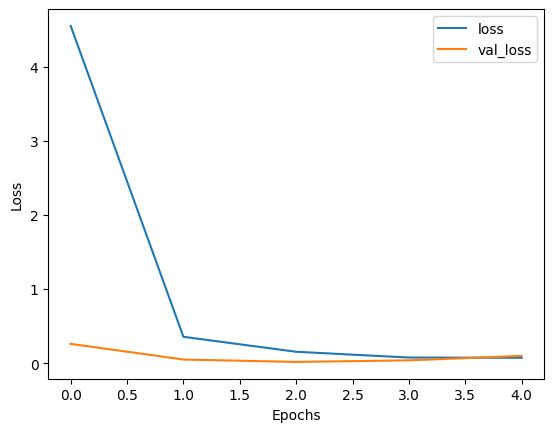

In [58]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step


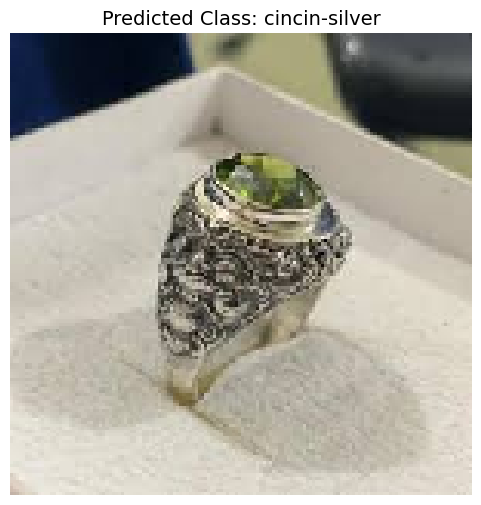

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
img_path = "C:/Users/Marsyani/Documents/dataset-ml/test-cincin.jpeg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(train_data.class_indices.keys())

# Display the image and the predicted class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_labels[predicted_class[0]]}", fontsize=14)
plt.show()